,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
1,-1.0,6520.921,6489.841,4611.082,4588.919,1598.893,2757.237,3105.009,4491.926,ACCELERATE
2,-1.0,6520.917,6489.847,4611.077,4588.924,1598.893,2757.318,310.501,465.304,ACCELERATE
3,-1.0,6520.918,6489.848,4611.077,4588.924,1598.893,2757.353,3105.009,4749.255,ACCELERATE
4,-1.0,6520.915,648.985,4611.075,4588.926,1598.893,2757.428,310.501,5066.826,ACCELERATE
5,-1.0,6520.905,6489.857,4611.071,4588.931,1598.894,2757.453,310.501,6166.537,ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
1755,-1.0,1233.283,9783.384,8493.308,7098.225,-9835.662,2791.606,5310.831,2720.337,RIGHT_ACCELERATE
1756,-1.0,1188.656,1000.109,8501.552,6990.651,-1130.655,279.166,5310.192,2730.217,RIGHT_ACCELERATE
1757,-1.0,1077.818,1318.045,841.475,8349.726,-1279.925,27.918,5324.244,2740.303,RIGHT_ACCELERATE
1758,-1.0,980.348,1991.025,8204.084,1149.535,-1425.081,2791.759,5353.962,2750.264,RIGHT_ACCELERATE


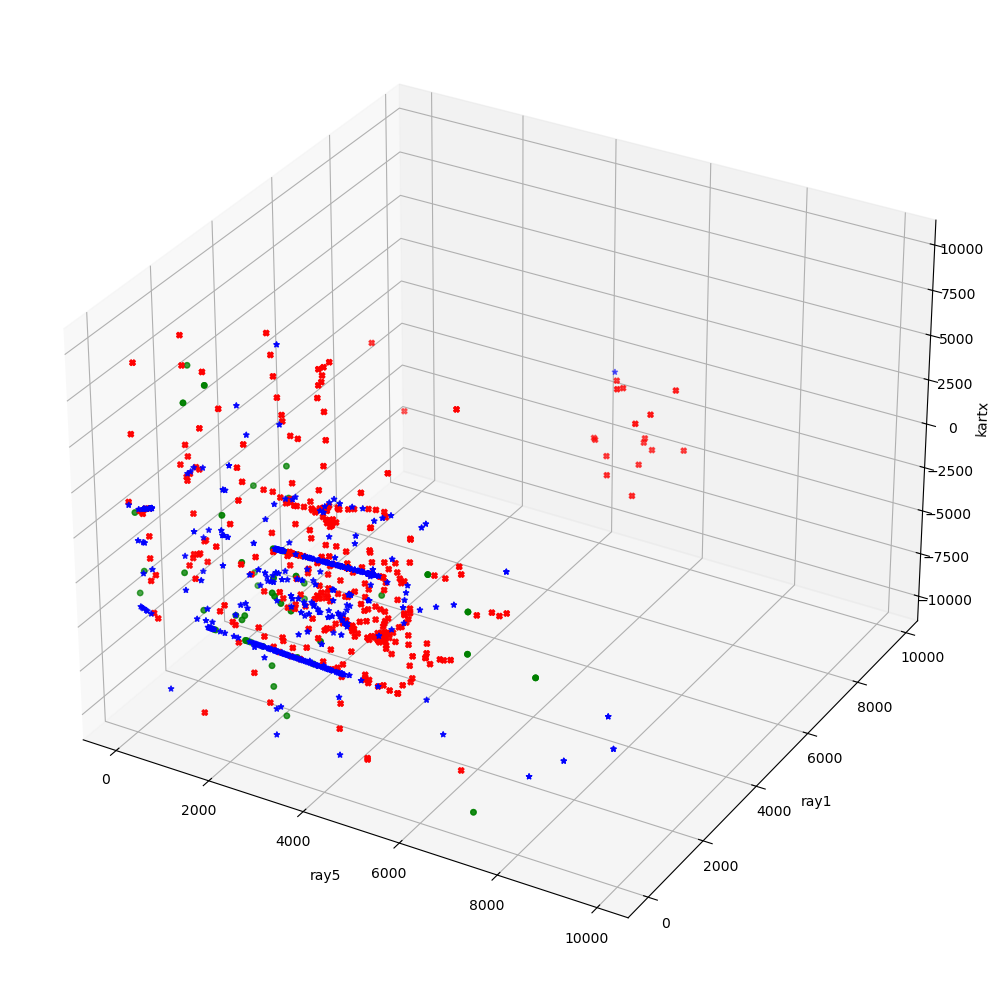

In [1]:
# Ejercicio 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from Utils import load_data_csv

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "karty", "kartz", "time"]
gameData, X, y = load_data_csv("KartData.csv", x_columns, "action")
display(gameData)

df1 = pd.DataFrame(gameData, columns=x_columns)

scaling = StandardScaler()
scaling.fit(df1)
scaled_data = scaling.transform(df1)

principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)

feature_weights_mapping = {}
for i, component in enumerate(principal.components_):
    component_feature_weights = zip(x_columns, component)
    sorted_feature_weight = sorted(component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
    feature_weights_mapping[i] = sorted_feature_weight

# En nuestro dataset, el número de clases es 3
# porque en ningún momento deceleramos (BRAKE)
label1 = feature_weights_mapping[0][0][0]
label2 = feature_weights_mapping[1][0][0]
label3 = feature_weights_mapping[2][0][0]

left_accelerate_pc1 = gameData[label1][y == "LEFT_ACCELERATE"]
right_accelerate_pc1 = gameData[label1][y == "RIGHT_ACCELERATE"]
accelerate_pc1 = gameData[label1][y == "ACCELERATE"]
left_accelerate_pc2 = gameData[label2][y == "LEFT_ACCELERATE"]
right_accelerate_pc2 = gameData[label2][y == "RIGHT_ACCELERATE"]
accelerate_pc2 = gameData[label2][y == "ACCELERATE"]
left_accelerate_pc3 = gameData[label3][y == "LEFT_ACCELERATE"]
right_accelerate_pc3 = gameData[label3][y == "RIGHT_ACCELERATE"]
accelerate_pc3 = gameData[label3][y == "ACCELERATE"]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(left_accelerate_pc1, left_accelerate_pc2, left_accelerate_pc3, c='red', marker='X', s=15)
ax.scatter(right_accelerate_pc1, right_accelerate_pc2, right_accelerate_pc3, c='green', marker='o', s=15)
ax.scatter(accelerate_pc1, accelerate_pc2, accelerate_pc3, c='blue', marker='*', s=15)
ax.set_xlabel(label1)
ax.set_ylabel(label2)
ax.set_zlabel(label3)

plt.tight_layout()
plt.savefig("ejercicio2.png")
plt.show()

MLP 2 hidden layers accuracy: 0.7095516569200779
MLP accuracy: 0.7115009746588694
SKlearn accuracy: 0.7368421052631579
SKlearn modified accuracy: 0.7153996101364523
KNN accuracy: 0.7076023391812866
Decision Tree accuracy: 0.7115009746588694
Random Forest accuracy: 0.7251461988304093


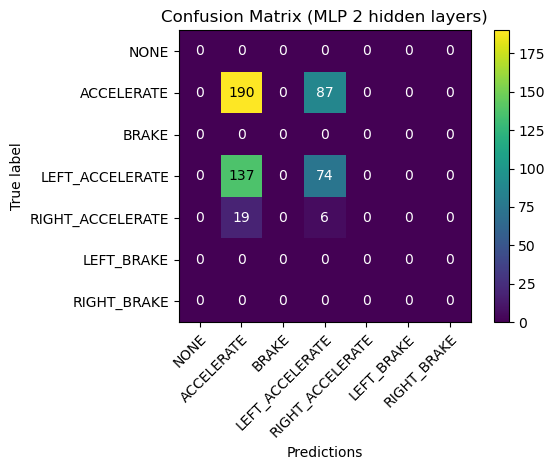

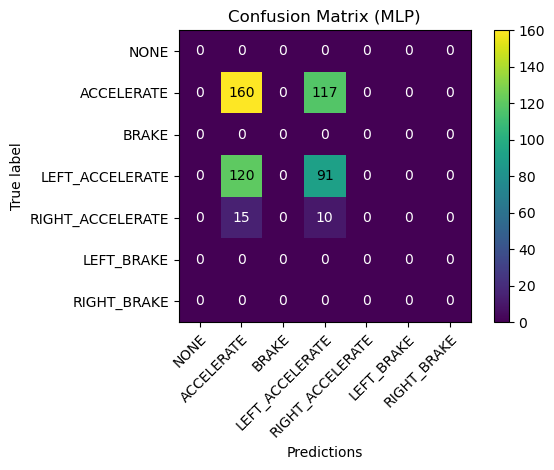

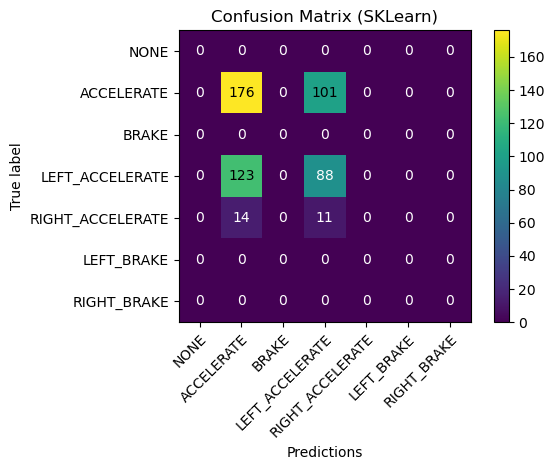

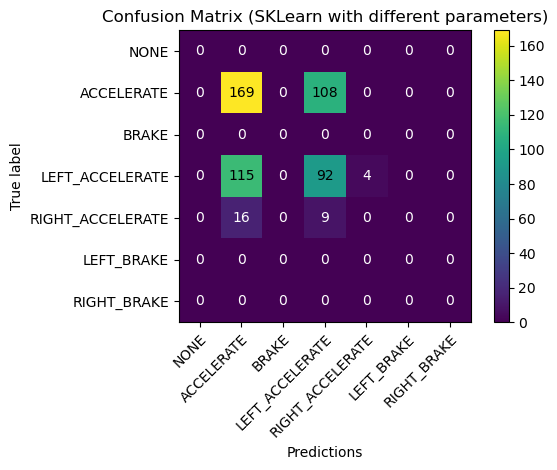

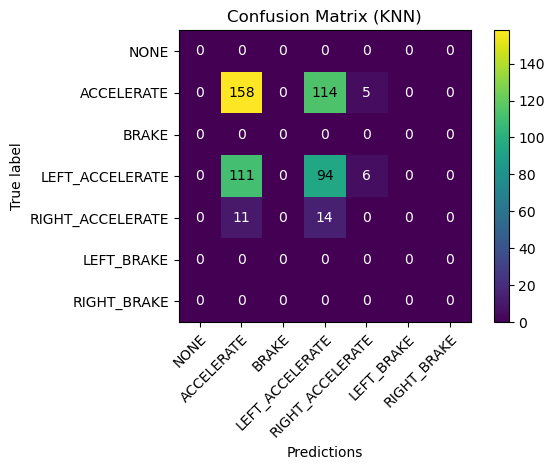

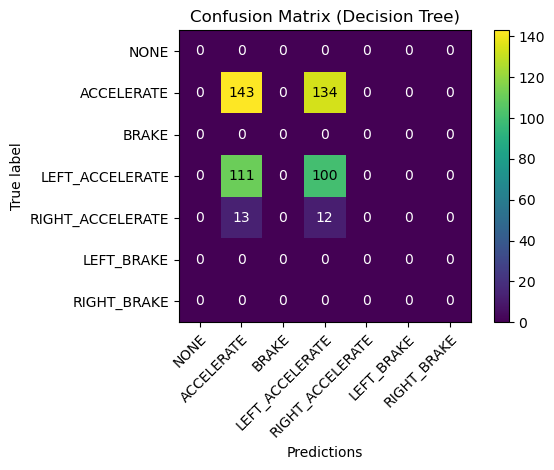

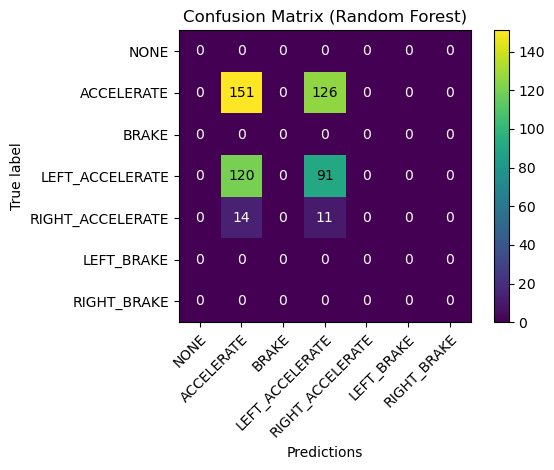

In [2]:
# Ejercicio 4
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from Utils import load_data_csv,one_hot_encoding,accuracy,calculateConfusionMatrix,drawConfusionMatrix
from MLP_Complete import MLP_Complete

label_mapping = {
    0: "NONE",
    1: "ACCELERATE",
    2: "BRAKE",
    3: "LEFT_ACCELERATE",
    4: "RIGHT_ACCELERATE",
    5: "LEFT_BRAKE",
    6: "RIGHT_BRAKE",
}
label_mapping_inverse = {
    "NONE": 0,
    "ACCELERATE": 1,
    "BRAKE": 2,
    "LEFT_ACCELERATE": 3,
    "RIGHT_ACCELERATE": 4,
    "LEFT_BRAKE": 5,
    "RIGHT_BRAKE": 6
}

label_array = ["NONE","ACCELERATE","BRAKE","LEFT_ACCELERATE","RIGHT_ACCELERATE","LEFT_BRAKE","RIGHT_BRAKE"]

x_columns = ["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "karty", "kartz", "time"]
kartData, X, y = load_data_csv("KartData.csv", x_columns, "action")

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X).T

# Split de los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
yEnc = one_hot_encoding(np.array(y_train),[label_array])
y_numbers = [label_mapping_inverse[label] for label in np.array(y)]

# Apartado 1
# Hiperparámetros para 2 capas ocultas
alpha_2 = 0.665 # learning rate
lambda_2 = 0.056
numiters_2 = 2200
hidden_layers_sizes_2 = [9,7]

# Perceptrón multicapa de implementación propia con más de 3 capas
mlpc_2 = MLP_Complete(X_train.shape[1],hidden_layers_sizes_2,yEnc.shape[1])
Jhistory_2 = mlpc_2.backpropagation(X_train,yEnc,alpha_2,lambda_2,numiters_2)
a1_2,ai_2,zi_2 = mlpc_2.feedforward(X_test)
y_pred_mlpc_2 = mlpc_2.predict(ai_2[len(ai_2) - 1])
y_pred_mlpc_labels_2 = [label_mapping[label] for label in y_pred_mlpc_2]

# Comprobación de resultados
accuracy_mlpc_2 = accuracy(y_test,y_pred_mlpc_labels_2)
print("MLP 2 hidden layers accuracy: " + str(accuracy_mlpc_2))

# Apartado 2
# Hiperparámetros para una única capa oculta
alpha_ = 0.665 # learning rate
lambda_ = 0.056
numiters_ = 2200
hidden_layers_sizes_ = [7]

# Perceptrón multicapa de implementación propia con una única capa
mlpc = MLP_Complete(X_train.shape[1],hidden_layers_sizes_,yEnc.shape[1])
Jhistory = mlpc.backpropagation(X_train,yEnc,alpha_,lambda_,numiters_)
a1,ai,zi = mlpc.feedforward(X_test)
y_pred_mlpc = mlpc.predict(ai[len(ai) - 1])
y_pred_mlpc_labels = [label_mapping[label] for label in y_pred_mlpc]

# Perceptrón multicapa de SKlearn
mlp = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_),activation='logistic',alpha=lambda_,learning_rate='constant',learning_rate_init=alpha_,max_iter=numiters_,random_state=0,epsilon=0.12)
mlp.fit(X_train,y_train)
y_pred_sklearn = mlp.predict(X_test)
y_pred_sklearn_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn]

# Comprobación de resultados para una única capa oculta 
accuracy_mlpc = accuracy(y_test,y_pred_mlpc_labels)
print("MLP accuracy: " + str(accuracy_mlpc))
accuracy_sklearn = accuracy(y_test,y_pred_sklearn)
print("SKlearn accuracy: " + str(accuracy_sklearn))

# Apartado 3
# SKLearn con distintos parámetros
skalpha = 1.0
sklearningrate = 0.25
skiters = 1850
mlp_2 = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers_sizes_2),activation='relu',alpha=skalpha,learning_rate='adaptive',solver='sgd',learning_rate_init=sklearningrate,max_iter=skiters,random_state=0,epsilon=0.12)
mlp_2.fit(X_train,y_train)
y_pred_sklearn_2 = mlp_2.predict(X_test)
y_pred_sklearn_2_numbers = [label_mapping_inverse[label] for label in y_pred_sklearn_2]

# Comprobación de resultados
accuracy_sklearn_2 = accuracy(y_test,y_pred_sklearn_2)
print("SKlearn modified accuracy: " + str(accuracy_sklearn_2))

# Apartado 4
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_numbers = [label_mapping_inverse[label] for label in y_pred_knn]

# Comprobación de resultados
accuracy_knn = accuracy(y_test,y_pred_knn)
print("KNN accuracy: " + str(accuracy_knn))

# Apartado 5
# Modelo de árbol de decisión 
decisiontree = DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=18,max_features=9)
decisiontree.fit(X_train,y_train)
y_pred_tree = decisiontree.predict(X_test)
y_pred_tree_numbers = [label_mapping_inverse[label] for label in y_pred_tree]

# Comprobación de resultados
accuracy_decisontree = accuracy(y_test,y_pred_tree)
print("Decision Tree accuracy: " + str(accuracy_decisontree))

# Modelo Random Forest
randomforest = RandomForestClassifier(n_estimators=80,max_depth=9,max_leaf_nodes=9)
randomforest.fit(X_train,y_train)
y_pred_forest = randomforest.predict(X_test)
y_pred_forest_numbers = [label_mapping_inverse[label] for label in y_pred_forest]

# Comprobación de resultados
accuracy_forest = accuracy(y_test,y_pred_forest)
print("Random Forest accuracy: " + str(accuracy_forest))

# Apartado 6
# Matrices de Confusión
# Perceptrón multicapa de implementación propia con más de 3 capas
matrix_mlpc_2 = calculateConfusionMatrix(yEnc,y_pred_mlpc_2,y_numbers)
drawConfusionMatrix(matrix_mlpc_2,label_array,label_array,"ejercicio4_mlpc_2.png",title="Confusion Matrix (MLP 2 hidden layers)")

# Perceptrón multicapa de implementación propia con una única capa
matrix_mlpc = calculateConfusionMatrix(yEnc,y_pred_mlpc,y_numbers)
drawConfusionMatrix(matrix_mlpc,label_array,label_array,"ejercicio4_mlpc.png",title="Confusion Matrix (MLP)")

# Perceptrón multicapa de SKlearn
matrix_sklearn = calculateConfusionMatrix(yEnc,y_pred_sklearn_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn,label_array,label_array,"ejercicio4_sklearn.png",title="Confusion Matrix (SKLearn)")

# SKLearn con distintos parámetros
matrix_sklearn_2 = calculateConfusionMatrix(yEnc,y_pred_sklearn_2_numbers,y_numbers)
drawConfusionMatrix(matrix_sklearn_2,label_array,label_array,"ejercicio4_sklearn_2.png",title="Confusion Matrix (SKLearn with different parameters)")

# Modelo KNN
matrix_knn = calculateConfusionMatrix(yEnc,y_pred_knn_numbers,y_numbers)
drawConfusionMatrix(matrix_knn,label_array,label_array,"ejercicio4_knn.png",title="Confusion Matrix (KNN)")

# Modelo de árbol de decisión
matrix_decisiontree = calculateConfusionMatrix(yEnc,y_pred_tree_numbers,y_numbers)
drawConfusionMatrix(matrix_decisiontree,label_array,label_array,"ejercicio4_tree.png",title="Confusion Matrix (Decision Tree)")

# Modelo Random Forest
matrix_randomforest = calculateConfusionMatrix(yEnc,y_pred_forest_numbers,y_numbers)
drawConfusionMatrix(matrix_randomforest,label_array,label_array,"ejercicio4_randomforest.png",title="Confusion Matrix (Random Forest)")

> Explica qué modelo crees que se adapta mejor al juego y cuál elegirías
